<a href="https://colab.research.google.com/github/lugsantistebanji/WCS-IA/blob/main/WCS_IA_Quetes_ML__Multiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)
print(df_weather.columns)
print(df_weather.info())

Index(['DATE', 'MAX_TEMPERATURE_C', 'MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM',
       'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'WEATHER_CODE_MORNING',
       'WEATHER_CODE_NOON', 'WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM',
       'UV_INDEX', 'SUNHOUR', 'OPINION', 'MONTH', 'DAY'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   

# Multivariate linear regression with Scikit-Learn

The equation of an univariate linear regresion is a line : aX +b

The equation of a multivariate linear regression with 2 variables is a plan : aW + bX + c

The equation of a multivariate linear regression with n variables is a hyperplan : a1 X1 + a2 X2 + .... + an Xn + b


## Let's start with 2 variables
With Plotly express, show a [3D scatterplot ](https://plotly.com/python/plotly-express/#3d-coordinates)with :
- X-axis : MAX temperature
- Y-axis : MIN temperature
- Z-axis : Sunhours


In [22]:
# Complete x, y and z in the script below:
px.scatter_3d(x = df_weather['MAX_TEMPERATURE_C'],
              y = df_weather['MIN_TEMPERATURE_C'],
              z= df_weather['SUNHOUR'],
              data_frame=df_weather)


Is it hard to read the 3D scatterplot ? You can move it with your mouse.

### Let's predict
You have to predict the MAX temperature from 2 variables :
- MIN temperature
- Sunhours

Hey, it's the reason why X has 2 brackets and is uppercase and y has a simple bracket and is lowercase . It can take multiple variables (X) to predict only one target (y).

**Remember to save the result of your prediction in a new column 'predict'.**

In [23]:
# Your code here :
from sklearn.linear_model import LinearRegression

X = df_weather[['MIN_TEMPERATURE_C','SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

model = LinearRegression().fit(X, y)

df_weather['MAX_TEMPERATURE_C_PREDICTED'] = model.predict(X)

### Let's visualize
With Plotly express, show a 3D scatterplot with :

- X-axis : your new 'predict' column
- Y-axis : MIN temperature
- Z-axis : Sunhours



In [39]:
# Your code here :
px.scatter_3d(x = df_weather['MAX_TEMPERATURE_C_PREDICTED'],
              y = df_weather['MIN_TEMPERATURE_C'],
              z= df_weather['SUNHOUR'],
              data_frame=df_weather)

**Move the cube with your mouse. Hey your 3D-scatterplot has a special shape : it's a plan !**

## Multivariate linear regressions with N-variables
Make a prediction with the maximum number of variables. But beware :
- variables must be numeric
- your target (MAX temperature) should not be present in variables

Store your prediction in a new column 'predict2'.

In our 3D human vision, we can't represent a hyperplan. But, let's trust in our computer, it can calculate. So trust it and show a simple scatterplot with :
- X-axis : Date
- Y-axis : MAX temperatures in blue dots and 'predict2' in orange dots

Expected result:

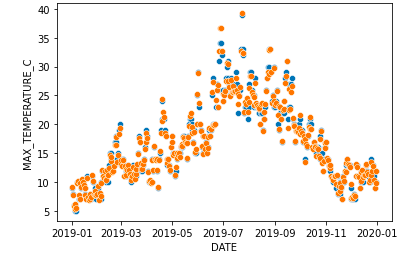

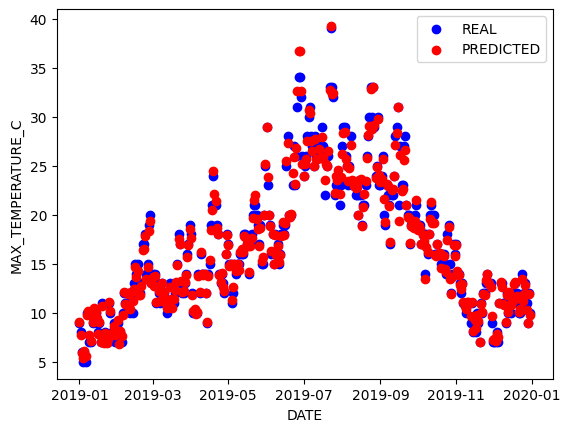

In [51]:
# Your code here :
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


X = df_weather[['MIN_TEMPERATURE_C', 'WINDSPEED_MAX_KMH',
       'TEMPERATURE_MORNING_C', 'TEMPERATURE_NOON_C', 'TEMPERATURE_EVENING_C',
       'PRECIP_TOTAL_DAY_MM', 'HUMIDITY_MAX_PERCENT', 'VISIBILITY_AVG_KM', 'PRESSURE_MAX_MB', 'CLOUDCOVER_AVG_PERCENT', 'HEATINDEX_MAX_C',
       'DEWPOINT_MAX_C', 'WINDTEMP_MAX_C', 'TOTAL_SNOW_MM', 'UV_INDEX','SUNHOUR']]
y = df_weather['MAX_TEMPERATURE_C']

model = LinearRegression().fit(X, y)

df_weather['MAX_TEMPERATURE_C_PREDICTED_2'] = model.predict(X)

df_weather['DATE'] = pd.to_datetime(df_weather['DATE'])

plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C'], color='blue')
plt.scatter(df_weather['DATE'], df_weather['MAX_TEMPERATURE_C_PREDICTED_2'], color='red')

plt.xlabel("DATE")
plt.ylabel("MAX_TEMPERATURE_C")
plt.legend(['REAL', 'PREDICTED'])
plt.show()

You can read coefficient for each column with the attribute `.coef_`. Which column has the biggest coefficient ?

In [61]:
# Your code here :

max_column, max_coefficient = max(zip (X.columns, model.coef_), key=lambda x: x[1])
min_column, min_coefficient = min(zip (X.columns, model.coef_), key=lambda x: x[1])

print(f"COLUMN WITH BIGGEST COEFFICIENT: {max_column} -> {max_coefficient}")
print(f"COLUMN WITH LOWEST COEFFICIENT: {min_column} -> {min_coefficient}")

COLUMN WITH BIGGEST COEFFICIENT: HEATINDEX_MAX_C -> 0.5878450236395425
COLUMN WITH LOWEST COEFFICIENT: TEMPERATURE_MORNING_C -> -0.07206418146871499
